
# Pandas

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Carga de datos

In [ ]:
# Lectura de una base de datos en internet y asignación a la variable df.
df=pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s03/dataVentas2009.csv")

In [ ]:
# Mostrar en pantalla las 8 primeras filas del dataFrame
df.head(8)

In [ ]:
df.columns

In [ ]:
# Tamaño del dataframe
df.shape

In [ ]:
# A continuación se analizan los tipos de datos que contiene el dataFrame anterior.
df.dtypes

In [ ]:
#Obtener un resumen conciso de los datos almacenados en el dataFrame
df.info()

In [ ]:
# Carga la tabla sin los ídices de las columnas (eje1)
pd.read_csv("sampledata.csv", header=None)

In [ ]:
# Cambiar los nombres de las columas
pd.read_csv("sampledata.csv", names=["id", "Nombre", "Apellido","Correo", "País", "Dirección_IP", "Longitud",
                                      "Latitud", "Años", "Puntaje"])

In [ ]:
# Saltar filas 
Nombres=["id", "Nombre", "Apellido","Correo", "País", "Dirección_IP", "Longitud", "Latitud", "Años", "Puntaje"]
pd.read_csv("sampledata.csv", skiprows=[0, 2, 3], names=Nombres)

In [ ]:
# Indexar 

## Formateo de datos temporales

In [ ]:
# Convertir los datos a un formato especial de tiempo
# pd.to_datetime(df.Fecha).head()
df.Fecha=pd.to_datetime(df.Fecha, format='%d/%m/%Y')

In [ ]:
# Creamos indices usando las fechas
df.set_index('Fecha', inplace=True)
df.head()

In [ ]:
df.tail()


## Procesamiento de datos nulos

In [ ]:
#df.isnull().head()
df.isna().head()

In [ ]:
# reemplazar los valores nulos con el valor deseado
df.Producto4.fillna(0)

In [ ]:
# Puede hacerse en una sola columna `df.columna.fillna()` 
# En todas al mismo tiempo `df.fillna()`
df.Producto4.fillna(df.Producto4.mean(),inplace=True) #Importante inplace
df


## Localización
Usando los comandos `iloc` y `loc`  en un dataframe, se puede acceder a los datos con base en las etiquetas y la ubicación respectivamente

In [ ]:
# Consultar el dato de la fila 2 columna 4
df.iloc[1,3]

In [ ]:
# Consultar los datos de las filas 1 a la 9  de las columnas 1 a 3 
df.iloc[0:10,0:4]

In [ ]:
# Muestra las filas 100 a la 110
df.iloc[100:110]

In [ ]:
#Muestra las filas entre dos datos 
df.loc["2009-10-01":"2009-10-10"]

In [ ]:
# Muestra las filas desde un dato espacífico en adelante de una columna
df[['Producto1']].iloc['2009-04-19':]

In [ ]:
# Muestra las filas 100 a 110 usando los indices de las columnas 
df[['Producto1','Producto4']].iloc[100:110]

In [ ]:
# Muestra todas las filas de las columnas 2 a 4
df.iloc[:,1:3]

In [ ]:
# iloc no funciona 
df.loc[df.Producto2 >= 10]

In [ ]:
# Muestra todos los datos con el valor elegido de la columna  
df[df.Producto2 == 7]

In [ ]:
# Cuenta los datos de todas las columna que coinciden con el dato elegido
df[df.Producto2 == 14].count()

 Opciones

* `df[column]`               Select single column or sequence of columns from the DataFrame
* `df.loc[:, cols]`          Select single column or subset of columns by label
* `df.loc[rows, cols]`       Select both row(s) and column(s) by label
* `df.iloc[rows]`            Select single row or subset of rows from the DataFrame by integer position

* `df.iloc[rows, cols]`      Select both row(s) and column(s) by integer position

* `df.iat[row, col]`         Select a single scalar value by row and column position (integers)

* `df.loc[rows]`             Select single row or subset of rows from the DataFrame by label
* `df.iloc[:, cols]`         Select single column or subset of columns by integer position
* `df.at[row, col]`          Select a single scalar value by row and column label
* `reindex`                  Select either rows or columns by labels method


     
  
   
    

## Edición de Dataframe

In [ ]:
# Modificar un valor de dataframe
df.iloc[109,0]=1000

In [ ]:
# Modificar un valor de dataframe
df.loc['2009-04-19','Producto1']=999

In [ ]:
# Agregamos un dato nulo 
df.loc['2009-01-02 00:00:00', 'Producto2'] = np.nan
df.head()

In [ ]:
# Eliminar datos por eje
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three","four"])
data

In [ ]:
# Borramos usando los índices de la fila (eje 0)
data.drop(index=["Colorado", "Ohio"])

In [ ]:
# Borrado de colunas
data.drop(columns=["two"])

In [ ]:
# Organización de dataframes: Organizar los dataframes con base a los valores de columnas o filas
df.sort_values(by="Producto1").head()

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=["three", "one"],   columns=["d", "a", "b", "c"])
frame

In [ ]:
# Ordena por el indice del eje 0
frame.sort_index()

In [ ]:
frame.sort_index(axis="columns", ascending=False)

## Índices duplicados

In [ ]:
df2 = pd.DataFrame(np.random.standard_normal((5, 3)), index=["a", "a", "b", "b", "c"])
df2

In [ ]:
 df2.index.is_unique

## Graficando desde pandas
Pandas permite realizar algunas gráficas directamente con el comando `DataFrame.plot()`.   

In [ ]:
df.Producto1.plot(figsize=(15,3))

In [ ]:
df.plot(figsize=(15,3))

Además de gráficos de línea, pandas tiene otro tipo de gráficos los cuales se puede usar con el argumento `kind` dentro del método DataFrame.plot(). Los otro gráficos disponibles son:

* `'bar'` or `'barh'` for bar plots
* `'hist'` for histogram
* `'box'` for boxplot
* `'kde'` or `'density'` for density plots
* ‘`'area'` for area plots
* `'scatter'` for scatter plots
* `'hexbin'` for hexagonal bin plots
* `'pie'` for pie plots

In [ ]:
df.Producto1.plot(kind='hist')

In [ ]:
df.hist(column='Producto1')


##  Operaciones con columnas y filas
La función `apply` regresa algún valor después de aplicarle una función a cada columna/fila del dataframe.


In [ ]:
#Creamos una columna con la raíz cuadrada de los datos de otra columna
df['Producto3sqrt']=df.Producto3.apply(np.sqrt)

In [ ]:
df.tail()

In [ ]:
# Sumamos todos los datos por columna
df.apply(np.sum, axis=0)

In [ ]:
df.apply(np.sum, axis=0).plot(kind='pie')

##  Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [ ]:
df.index

In [ ]:
# Agregamos una columna y llenamos datos 
df["month"] = [i.month for i in df.index]
df.tail()

In [ ]:
# Calcula el máximo por mes
df.groupby("month").max()

In [ ]:
# Cuenta el número datos en una columna por mes
df.groupby("month")["Producto1"].count()

In [ ]:
df2 = pd.DataFrame({"Person": ["John", "Myla", "Lewis", "John", "Myla", "Lewis", "John", "Myla"], "Age": [24, 55, 21, 24, 26, 43, 64, 55]})
df2.head(8)

In [ ]:
# Agrupar por persona y aplicar "min" a "Age"
df2.groupby("Person").Age.agg("min")
#df2.groupby("Person").Age.agg(["min"])


In [ ]:
# Agrupar por persona y edad y aplicar "count" a "Age"
df2.groupby(["Person","Age"]).agg({"Age":"count"})

In [ ]:
# frecuencia de las edades
df2['Age'].value_counts()
#df2["Age"].value_counts(Normlize=True)

## Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [ ]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

In [ ]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

In [ ]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner')

In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')



<p><a name="tallpan"></a></p>

## 3. Taller Pandas

### Ejercicio 1

Cargue el dataset provisto en la dirección 'https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv'  grafique la ganancia total (total_profit) para todos los meses. La gráfica debe tener las siguientes propiedades:

* El estilo de línea punteado y de color rojo
* Mostrar la legenda (legend) en la parte inferior derecha
* X label name = Month Number
* Y label name = Profits in dollars
* Título : Company sales data of last year
* Los markers deben ser circulares y de color negro
* El grosor de la línea debe ser 3

Solución esperada:
<p><img  height="260px" src="https://pynative.com/wp-content/uploads/2019/01/matplotlib_and_pandas_exercise_2_plot_style_properties-768x512.png" align="center" hspace="10px" vspace="0px"></p>

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt
df=pd.read_csv('company_sales_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


In [33]:
import seaborn.objects as so

ModuleNotFoundError: No module named 'seaborn.objects'

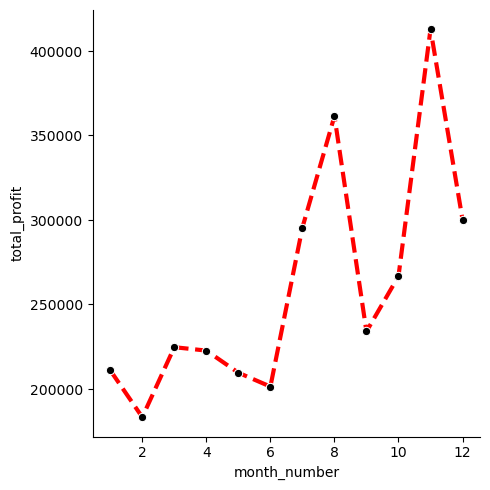

In [30]:
sns.relplot(data=df, x='month_number', y='total_profit', kind='line', marker='o', linestyle='--', color='r',
           markerfacecolor='k',linewidth=3, )
plt.show()

Para ver la solución haga double-click <b>aquí</b>.
<!--

import pandas as pd
import matplotlib.pyplot as plt  
df = pd.read_csv('https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv')
profitList = df ['total_profit'].tolist()
monthList  = df ['month_number'].tolist()
plt.plot(monthList, profitList, label = 'Profit data of last year',
      color='r', marker='o', markerfacecolor='k',
      linestyle='--', linewidth=3)
      
plt.xlabel('Month Number')
plt.ylabel('Profit in dollar')
plt.legend(loc='lower right')
plt.title('Company Sales data of last year')
plt.xticks(monthList)
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()
-->

### Ejercicio 2

Dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

1. Importar el dataset, asignarlo a una variable llamada *users* y usar el *user_id* como índice.
2. ¿Cuál es el número de observaciones y columnas en el dataset?
3. Mostrar el nombre de las columnas y el tipo de dato que contiene.
4. Mostrar la indexación del dataset.
5. ¿Cuántas ocupaciones diferentes hay en este conjunto de datos?
6. ¿Cuál es la ocupación más frecuente?
7. ¿Cuál es la edad media de los usuarios?
8. ¿Cuál es la edad con menos ocurrencia?


Para ver la solución haga double-click <b>aquí</b>.
<!--

1.

import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|', index_col='user_id')
users.head()
  
2.
print("Número de observaciones:",users.shape[0])
print("Número de columnas: ",users.shape[1])

3.
print("Columnas: ",users.columns)
print("Tipo de datos: \n",users.dtypes)

4.
print("Indexación: ",users.index)

5.
print("Número de ocupaciones diferentes:",users.occupation.nunique())

6.
print("Ocupaciones más frecuentes:\n",users.occupation.value_counts().head())

7.
print("Edad media de los usuarios:",round(users.age.mean()))

8.
print("Edades de menos ocurrencia:\n",users.age.value_counts().tail(10))

-->

### Ejercicio 3

Diccionario dado:

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}
            
1. Crea un DataFrame llamado *army* a partir del diccionario dado

(No olvide incluir los nombres de las columnas en el orden presentado en el diccionario ('regimen', 'company', ...) para que el orden del índice de la columna sea coherente con las soluciones. Si se omite, Pandas ordenará las columnas alfabéticamente.

2. Establezca la columna 'origin' como índice del dataset.
3. Imprima las columnas 'veterans' y 'deaths'
4. Seleccione las columnas 'deaths', 'size' y 'deserters' de Maine a Alaska.
5. Seleccione la tercera columna hasta la séptima columna.
6. Seleccione las filas donde *deaths* sea mayor que 50.
7. Seleccione las filas donde *deaths* sea mayor que 500 o menor que 50.
8. Selecciona todos los *regiments* no nombrados *Dragoons*.
9. Seleccione la tercera celda en la fila llamada *Arizona*
10. Seleccione la tercera celda en la columna llamada *deaths*


Para ver la solución haga double-click <b>aquí</b>.
<!--
1.
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35], 'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9], 'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523], 'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345], 'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3], 'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3], 'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

army = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

army.head()

2.
army = army.set_index("origin")
army.head()

3.
army[['veterans', 'deaths']]

4.
army.loc[['Maine','Alaska'] , ["deaths","size","deserters"]]

5.
army.iloc[: , 4:7]

6.
army[army['deaths'] > 50]

7.
army[(army['deaths'] > 500) | (army['deaths'] < 50)]

8.
army[(army['regiment'] != 'Dragoons')]

9.
army.loc[['Arizona'], ['deaths']]

#O

#army.iloc[[0]

10.
army.loc['Texas', 'deaths']

#O

#army.iloc[[2]


-->

### Ejercicio 4

Dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

1.  Importar el dataset, asignarlo a una variable llamada *users* y usar el *user_id* como índice.
2. ¿Cuál es la edad media por ocupación?
3. Descubra la proporción de hombres por ocupación y clasifíquela de mayor a menor (cree una columna).
4. Para cada ocupación calcule las edades mínimas y máximas.
5. Para cada combinación de ocupación y género calcule la edad media.
6. Para cada ocupación muestre el porcentaje de mujeres y hombres.

Para ver la solución haga double-click <b>aquí</b>.
<!--

1.

import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|', index_col='user_id')
users.head()
  
2.
users.groupby('occupation').age.mean()

3.
# funcion que mapea el genero a un numero
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# aplica la funcion a la columna genero y saca el porcentaje de hombres por ocupacion
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# se
a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100

# ordenamiento de mayor a menor
a.sort_values(ascending = False)

4.
users.groupby('occupation').age.agg(['min', 'max'])

5.
users.groupby(['occupation', 'gender']).age.mean()

6.
# crea un dataframe y aplica "count" al genero
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# crea un dataframe y aplica "count" para cada ocupacion
occup_count = users.groupby(['occupation']).agg('count')

# divida gender_ocup por occup_count y multiplique por 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# mostrar todas las filas de la columna genero
occup_gender.loc[: , 'gender']

-->